<a href="https://colab.research.google.com/github/mhabib80/Coursera_Capstone/blob/master/Capstone_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium
import json

print('Libraries imported.')

Libraries imported.


In [0]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# **1. Data Collection & Preparation**

Below is a link to a dataset developed by Zillow, a leading realty listings Website in the USA. It shows the median home price by city and year throughout the USA

In [4]:
url='http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv'
housing=pd.read_csv(url, encoding='latin-1')
housing.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,6181,New York,NY,New York-Newark-Jersey City,Queens County,1,194476.0,194292.0,194160.0,194088.0,193954.0,193912.0,193982.0,194136.0,194395.0,194783.0,195773.0,196821.0,197777.0,198234.0,198817.0,199507.0,200418.0,201334.0,202246.0,203408.0,204616.0,205901.0,206513.0,207017.0,207400.0,208200.0,209030.0,209813.0,210858.0,212042.0,213492.0,214692.0,215924.0,216990.0,218352.0,219798.0,221670.0,223666.0,225814.0,228303.0,230542.0,232806.0,234645.0,236424.0,238239.0,240213.0,242890.0,245938.0,248992.0,251844.0,254521.0,257230.0,259619.0,262125.0,264876.0,268108.0,270980.0,273717.0,276310.0,279798.0,283250.0,286337.0,288555.0,290646.0,292892.0,294933.0,297101.0,299652.0,302686.0,305858.0,307816.0,307467.0,306729.0,306738.0,308624.0,310849.0,313869.0,317123.0,320162.0,322241.0,324349.0,326472.0,329766.0,334245.0,339404.0,344113.0,348769.0,352307.0,355559.0,357704.0,360184.0,362922.0,365774.0,369539.0,373145.0,376875.0,379983.0,383639.0,387444.0,391808.0,395664.0,400803.0,406395.0,413350.0,419136.0,424026.0,428525.0,434198.0,441000.0,447104.0,452010.0,458135.0,464571.0,471842.0,479214.0,486268.0,493722.0,499667.0,505331.0,507545.0,509662.0,512200.0,517186.0,520373.0,523226.0,523832.0,521642.0,517084.0,514076.0,513209.0,513688.0,516864.0,518529.0,520780.0,518409.0,517438.0,516128.0,515427.0,516294.0,517246.0,517934.0,517743.0,516679.0,514031.0,511164.0,506595.0,503606.0,499720.0,496530.0,492929.0,489533.0,486182.0,481986.0,477124.0,471749.0,467578.0,463766.0,460606.0,456993.0,453188.0,449585.0,446614.0,444262.0,443618.0,443364.0,443549.0,443739.0,442344.0,441671.0,441362.0,443295.0,445617.0,446915.0,448186.0,448602.0,447908.0,4462

Filter on California Cites only and the latest available home price

In [5]:
housing=housing[housing['State'] == 'CA'] # Filter on California Cites only
housing = housing[['RegionName', '2020-01']]# Filter on the latest available home price at the time of this report, which is Jan 2020
housing.columns=['City', 'Median_Home_Price'] # rename column headers
housing.reset_index(drop=True, inplace=True)
housing.head()

,City,Median_Home_Price
0,Los Angeles,730871
1,San Diego,663624
2,San Jose,1037137
3,San Francisco,1414704
4,Sacramento,353191


Explore the data set

In [6]:
# check the type of Data
housing.dtypes

City                 object
Median_Home_Price     int64
dtype: object

In [7]:
# Chaneg data types to allow analysis and reconfiguration of data
housing['City']=housing['City'].astype('str') # convert the column 'City' to type string to be able to merge/join later
housing['Median_Home_Price']=housing['Median_Home_Price'].astype(float) # convert the median home prce to foat to be able to run calculations
housing.dtypes

City                  object
Median_Home_Price    float64
dtype: object

In [8]:
# check for duplicates
duplicates= housing[housing['City'].duplicated() == True] 
duplicates

,City,Median_Home_Price
585,Burbank,965632.0


In [9]:
# Sort the list by highest home value
housing.sort_values('Median_Home_Price', ascending=False, inplace=True)
housing.head()

,City,Median_Home_Price
531,Atherton,6624096.0
516,Los Altos Hills,4585966.0
460,Hillsborough,4318481.0
623,Portola Valley,3827329.0
725,Belvedere,3821253.0


In [0]:
# Check the dataset statistical properties
housing.shape, housing['Median_Home_Price'].describe()

((1108, 2), count    1.108000e+03
 mean     5.809123e+05
 std      5.829691e+05
 min      3.516400e+04
 25%      2.639202e+05
 50%      4.090085e+05
 75%      6.698535e+05
 max      6.624096e+06
 Name: Median_Home_Price, dtype: float64)

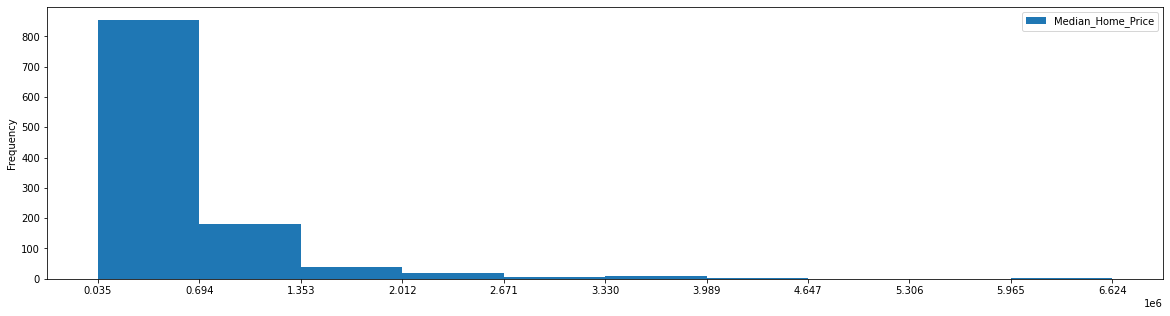

In [17]:
count, bin_edges=np.histogram(housing['Median_Home_Price'])
housing.plot(kind='hist', figsize=(20,5), xticks=bin_edges)

In [20]:
# let's limit the profiling to the upper middle range, where neighborhoods would be affordable and more on the upside scale.
df_h=housing.query('409008 <= Median_Home_Price <= 669853')
df_h.reset_index(drop=True, inplace=True)
df_h.shape, 

((277, 2),)

In [0]:
df_h.head()

,City,Median_Home_Price
0,Hawthorne,669811.0
1,Morro Bay,667332.0
2,Sand City,666625.0
3,Alondra Park,666279.0
4,Del Rey Oaks,665792.0


In [0]:
# Add blank columns for latitude and longitude to be filled out in the next step
df_h['Latitude'] = ''
df_h['Longitude'] = ''
df_h.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Median_Home_Price,Latitude,Longitude
0,Hawthorne,669811.0,,
1,Morro Bay,667332.0,,
2,Sand City,666625.0,,
3,Alondra Park,666279.0,,
4,Del Rey Oaks,665792.0,,


Now Obtain the coordinates of each city

In [0]:
# run a loop 
for i in np.arange(len(df_h['City'])):
  try:
    address = '{}, California'.format(df_h['City'][i])
    geolocator = Nominatim(user_agent='CA_City_explorer')
    location = geolocator.geocode(address)
    df_h['Latitude'][i]  = location.latitude
    df_h['Longitude'][i] = location.longitude
  except:
    pass

df_h.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,City,Median_Home_Price,Latitude,Longitude
0,Del Rey Oaks,652483.0,36.5933,-121.835
1,San Diego,652175.0,32.7174,-117.163
2,Wilton,650138.0,38.4203,-121.206
3,Windsor,644473.0,38.5471,-122.816
4,Garden Grove,643528.0,33.7746,-117.946


In [0]:
# Check for blanks or missed data
df_h.isnull().sum()

City                 0
Median_Home_Price    0
Latitude             0
Longitude            0
dtype: int64

In [0]:
# upon reviewing the data, it looks like this city has the wrong coordinates. Let's fix that
Piru_location = geolocator.geocode('Piru, CA, USA')
Piru_Latitude  = Piru_location.latitude
Piru_Longitude = Piru_location.longitude

Piru_Latitude, Piru_Longitude

(34.4156137, -118.7927456)

In [0]:
df_h.loc[254, 'Latitude'] = Piru_Latitude
df_h.loc[254, 'Longitude'] = Piru_Longitude
df_h.iloc[254,:]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


City                    Piru
Median_Home_Price     409060
Latitude             34.4156
Longitude           -118.793
Name: 254, dtype: object

Download already stored csv file

In [57]:
df_h = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_ll.csv', index_col=0)
df_h.head()

,City,Median_Home_Price,Latitude,Longitude
0,Del Rey Oaks,652483.0,36.593293,-121.834951
1,San Diego,652175.0,32.717421,-117.162771
2,Wilton,650138.0,38.420310,-121.206367
3,Windsor,644473.0,38.547133,-122.816380
4,Garden Grove,643528.0,33.774629,-117.946372


Now let's find California's coordinates and prepare the map for visualization

In [37]:
geolocator = Nominatim(user_agent='CA_City_explorer')
CA_location = geolocator.geocode('CA, USA')
CA_Latitude  = CA_location.latitude
CA_Longitude = CA_location.longitude

CA_Latitude, CA_Longitude

(36.7014631, -118.7559974)

In [0]:
Cali_Map = folium.Map(location=[CA_Latitude, CA_Longitude], zoom_start=6)

for lat, lng, city in zip(df_h['Latitude'], df_h['Longitude'], df_h['City']):
    label = city
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Cali_Map)  

Cali_Map

Now let's explore each city

In [0]:
CLIENT_ID = 'WF3UFSFKJBIBLCW0Y5XXB2YRFX5FSSH5PMCG5DBVBO1VG5M5' # your Foursquare ID
CLIENT_SECRET = 'BUJC40DXTZELH5ZLGTQGYHECLOEOPR4DDLK4FIS4T0MQ4F5N' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 16000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WF3UFSFKJBIBLCW0Y5XXB2YRFX5FSSH5PMCG5DBVBO1VG5M5
CLIENT_SECRET:BUJC40DXTZELH5ZLGTQGYHECLOEOPR4DDLK4FIS4T0MQ4F5N


In [0]:
#These are the main primary categories that will be used to exploring and profiling cities

cat = ['Arts & Entertainment',
       'College & University',
       'Event',
       'Food',
       'Nightlife Spot',
       'Outdoors & Recreation',
       'Professional & Other Places',
       'Residence',
       'Shop & Service',
       'Travel & Transport']

cat_id = ['4d4b7104d754a06370d81259',
          '4d4b7105d754a06372d81259',
          '4d4b7105d754a06373d81259',
          '4d4b7105d754a06374d81259',
          '4d4b7105d754a06376d81259',
          '4d4b7105d754a06377d81259',
          '4d4b7105d754a06375d81259',
          '4e67e38e036454776db1fb3a',
          '4d4b7105d754a06378d81259',
          '4d4b7105d754a06379d81259']

This is the city data that we collected above, we will now add columns representing thos primary categories, to be filled out in the steps below using Foursquare's API

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_ll.csv', index_col=0)
df.head()

,City,Median_Home_Price,Latitude,Longitude
0,Del Rey Oaks,652483.0,36.593293,-121.834951
1,San Diego,652175.0,32.717421,-117.162771
2,Wilton,650138.0,38.420310,-121.206367
3,Windsor,644473.0,38.547133,-122.816380
4,Garden Grove,643528.0,33.774629,-117.946372


In [0]:
# Add a column for each category
for c in cat:
  df[c]=0 
  
df.head(280)

In [0]:
# define the equation to be looped through all cells 
def get_count(la, ln, c_id):
  url_query= 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                la,
                ln,
                radius,
                c_id)
  return requests.get(url_query).json()['response']['totalResults']

In [0]:
# run a loop to run the get_count equation defined above for each city across and each category
for c in np.arange(len(cat_id)):
  print(c)
  for i, row in df.iterrows():
    df.loc[i,cat[c]] = get_count(df.loc[i,'Latitude'], df.loc[i,'Longitude'], cat_id[c])

**Download already stored CSV**<br>
*Note that due to limits on the free Foursquare account, the above step had to be executed multiple times.*

In [0]:
df.to_csv('df_venues.csv')

In [26]:
df_v=pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_venues.csv', index_col=0)
df_v.head()

,City,Median_Home_Price,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Del Rey Oaks,652483.0,36.593293,-121.834951,70,76,11,198,62,189,127,24,204,176
1,San Diego,652175.0,32.717421,-117.162771,219,189,15,247,249,224,275,148,235,233
2,Wilton,650138.0,38.420310,-121.206367,3,5,0,37,8,89,74,10,132,35
3,Windsor,644473.0,38.547133,-122.816380,39,59,2,189,84,127,189,30,157,103
4,Garden Grove,643528.0,33.774629,-117.946372,176,177,28,232,239,219,290,138,206,222


In [27]:
df_v.shape

(276, 14)

# **2. Data Modeling**

In [29]:
# check the data types
df_v.dtypes

City                            object
Median_Home_Price              float64
Latitude                       float64
Longitude                      float64
Arts & Entertainment             int64
College & University             int64
Event                            int64
Food                             int64
Nightlife Spot                   int64
Outdoors & Recreation            int64
Professional & Other Places      int64
Residence                        int64
Shop & Service                   int64
Travel & Transport               int64
dtype: object

In [32]:
#convert data types to prepare for modeling
df_c = df_v[cat].astype(float)
df_c['Median_Price'] = df_v['Median_Home_Price']
df_c.head()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Median_Price
0,70.0,76.0,11.0,198.0,62.0,189.0,127.0,24.0,204.0,176.0,652483.0
1,219.0,189.0,15.0,247.0,249.0,224.0,275.0,148.0,235.0,233.0,652175.0
2,3.0,5.0,0.0,37.0,8.0,89.0,74.0,10.0,132.0,35.0,650138.0
3,39.0,59.0,2.0,189.0,84.0,127.0,189.0,30.0,157.0,103.0,644473.0
4,176.0,177.0,28.0,232.0,239.0,219.0,290.0,138.0,206.0,222.0,643528.0


In [33]:
# prepare the data for modeling
from sklearn.preprocessing import StandardScaler
Clus = StandardScaler().fit_transform(df_c)
Clus_df=pd.DataFrame(Clus)
Clus_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.320084,0.000405,0.453747,0.524542,-0.162664,0.972276,-0.264969,-0.395646,0.809916,1.292639,1.903349
1,3.086027,1.577724,0.934954,1.088445,2.276452,1.470825,1.497237,2.533318,1.284581,2.181714,1.899239
2,-0.923663,-0.990654,-0.869573,-1.328284,-0.867008,-0.452153,-0.896030,-0.726336,-0.292533,-0.906650,1.872057
3,-0.255381,-0.236891,-0.628969,0.420968,0.124290,0.089130,0.473252,-0.253922,0.090262,0.154000,1.796464
4,2.287802,1.410221,2.498878,0.915822,2.146018,1.399604,1.675839,2.297112,0.840539,2.010138,1.783854


In [34]:
# develop the model
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=100)
k_means.fit(Clus_df)
labels = k_means.labels_

print(labels), labels.shape

[2 1 0 2 1 3 0 2 0 1 2 2 0 0 0 2 3 2 0 1 0 1 2 0 2 0 3 0 3 0 1 1 2 0 1 0 3
 1 3 0 2 0 1 0 2 0 1 2 2 2 2 2 1 2 3 2 3 1 3 2 1 1 0 2 0 1 1 2 2 2 1 3 0 2
 1 2 0 0 2 2 1 2 1 3 2 2 2 3 0 0 1 2 2 2 2 0 2 3 3 3 2 2 1 0 1 2 2 2 2 1 0
 1 2 0 0 2 2 2 2 2 2 0 0 2 2 2 3 3 3 0 3 0 1 2 2 3 0 0 2 2 3 0 2 2 3 2 2 0
 3 2 2 1 0 1 2 2 0 2 2 0 3 0 2 1 1 0 3 2 1 3 1 0 2 1 3 3 1 3 0 3 1 0 1 2 3
 3 0 0 2 1 3 1 3 2 2 0 3 2 0 2 2 0 3 0 2 1 3 3 3 3 0 3 3 3 0 0 3 3 0 3 3 1
 3 2 2 2 3 2 2 0 3 0 2 3 2 2 2 0 3 2 2 2 3 3 2 3 0 0 3 0 2 2 0 0 3 3 0 0 0
 1 3 2 3 0 0 3 3 0 0 3 3 3 2 0 3 3]


(None, (276,))

In [35]:
#add the cluster labels into the dataframe
df_v['Cluster'] = labels
df_v.head()

,City,Median_Home_Price,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Cluster
0,Del Rey Oaks,652483.0,36.593293,-121.834951,70,76,11,198,62,189,127,24,204,176,2
1,San Diego,652175.0,32.717421,-117.162771,219,189,15,247,249,224,275,148,235,233,1
2,Wilton,650138.0,38.420310,-121.206367,3,5,0,37,8,89,74,10,132,35,0
3,Windsor,644473.0,38.547133,-122.816380,39,59,2,189,84,127,189,30,157,103,2
4,Garden Grove,643528.0,33.774629,-117.946372,176,177,28,232,239,219,290,138,206,222,1


Now let's visualize the clustering on the map

In [0]:
#add the cluster labels to the map and color code

map_clusters = folium.Map(location=[CA_Latitude, CA_Longitude], zoom_start=6)
colors = ['red', 'blue', 'green', 'purple']

for lat, lon, city, cluster in zip(df_v['Latitude'], df_v['Longitude'], df_v['City'], df_v['Cluster']):
    label = folium.Popup(str(city) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Check if there's correlation between the different categories

In [39]:
df_c.corr()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Median_Price
Arts & Entertainment,1.000000,0.862877,0.864044,0.752411,0.962075,0.795878,0.796296,0.933100,0.512949,0.849478,0.217104
College & University,0.862877,1.000000,0.786626,0.825038,0.868188,0.832820,0.830461,0.850681,0.564169,0.821341,0.194629
Event,0.864044,0.786626,1.000000,0.648216,0.876603,0.707699,0.739814,0.834051,0.440803,0.751502,0.187655
Food,0.752411,0.825038,0.648216,1.000000,0.768234,0.922241,0.908703,0.757526,0.794543,0.886321,0.254736
Nightlife Spot,0.962075,0.868188,0.876603,0.768234,1.000000,0.794645,0.801223,0.904082,0.491903,0.833640,0.208383
Outdoors & Recreation,0.795878,0.832820,0.707699,0.922241,0.794645,1.000000,0.928315,0.781833,0.766495,0.934094,0.312785
Professional & Other Places,0.796296,0.830461,0.739814,0.908703,0.801223,0.928315,1.000000,0.807265,0.830558,0.899470,0.233449
Residence,0.933100,0.850681,0.834051,0.757526,0.904082,0.781833,0.807265,1.000000,0.546304,0.832212,0.171026
Shop & Service,0.512949,0.564169,0.440803,0.794543,0.491903,0.766495,0.830558,0.546304,1.000000,0.726366,0.194575
Travel & Transport,0.849478,0.821341,0.751502,0.886321,0.833640,0.934094,0.899470,0.832212,0.726366,1.000000,0.280579



looking at the correlations with the Median home Price, it seems there's category counts have little to do with the home value....

# **3. Data Visualizations & Plots**

In [59]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


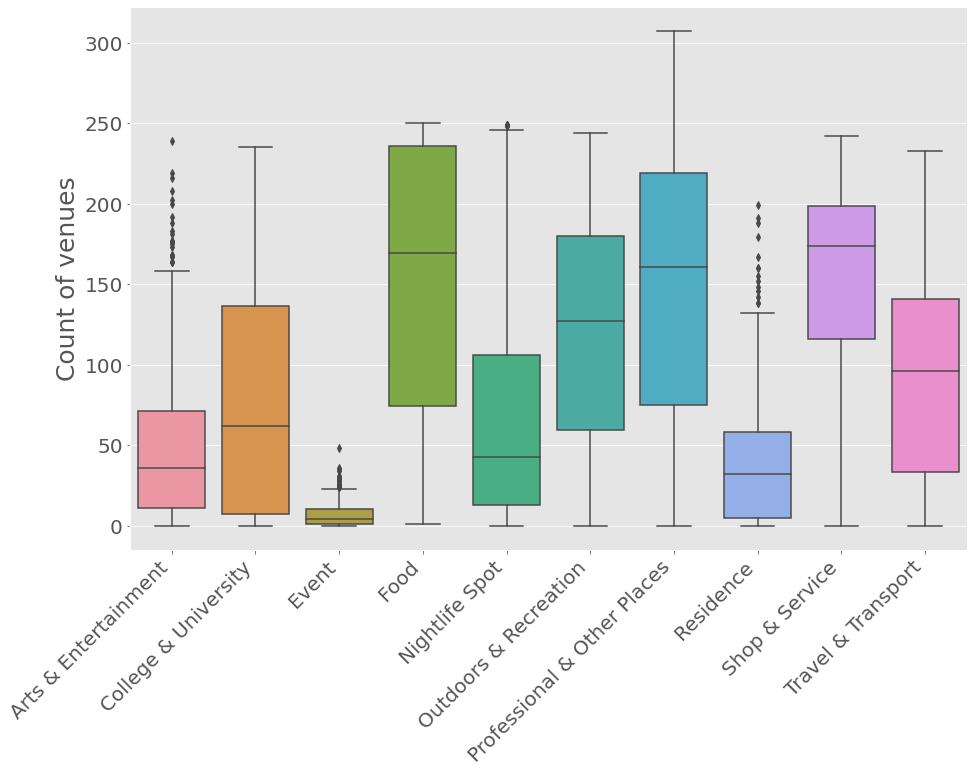

In [60]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = df_v[cat])
ax.set_ylabel('Count of venues', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [46]:
#check the median value per category per cluster
df_g=df_v.drop(['City', 'Median_Home_Price', 'Latitude', 'Longitude'], axis=1)
df_g=df_g.groupby('Cluster').mean().round()
df_g.head()


,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
Cluster,,,,,,,,,,
0,18.0,31.0,3.0,115.0,25.0,87.0,123.0,17.0,168.0,61.0
1,158.0,184.0,23.0,240.0,220.0,206.0,257.0,119.0,190.0,180.0
2,65.0,112.0,8.0,226.0,95.0,171.0,202.0,51.0,192.0,134.0
3,7.0,5.0,1.0,33.0,8.0,33.0,36.0,2.0,51.0,16.0


In [63]:
# Transpose data to columns for plotting
df_g1 = df_g.T.reset_index()
df_g1.columns = ['Category', 'Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3']
df_g1.head(20)

,Category,Cluster_0,Cluster_1,Cluster_2,Cluster_3
0,Arts & Entertainment,18.0,158.0,65.0,7.0
1,College & University,31.0,184.0,112.0,5.0
2,Event,3.0,23.0,8.0,1.0
3,Food,115.0,240.0,226.0,33.0
4,Nightlife Spot,25.0,220.0,95.0,8.0
5,Outdoors & Recreation,87.0,206.0,171.0,33.0
6,Professional & Other Places,123.0,257.0,202.0,36.0
7,Residence,17.0,119.0,51.0,2.0
8,Shop & Service,168.0,190.0,192.0,51.0
9,Travel & Transport,61.0,180.0,134.0,16.0


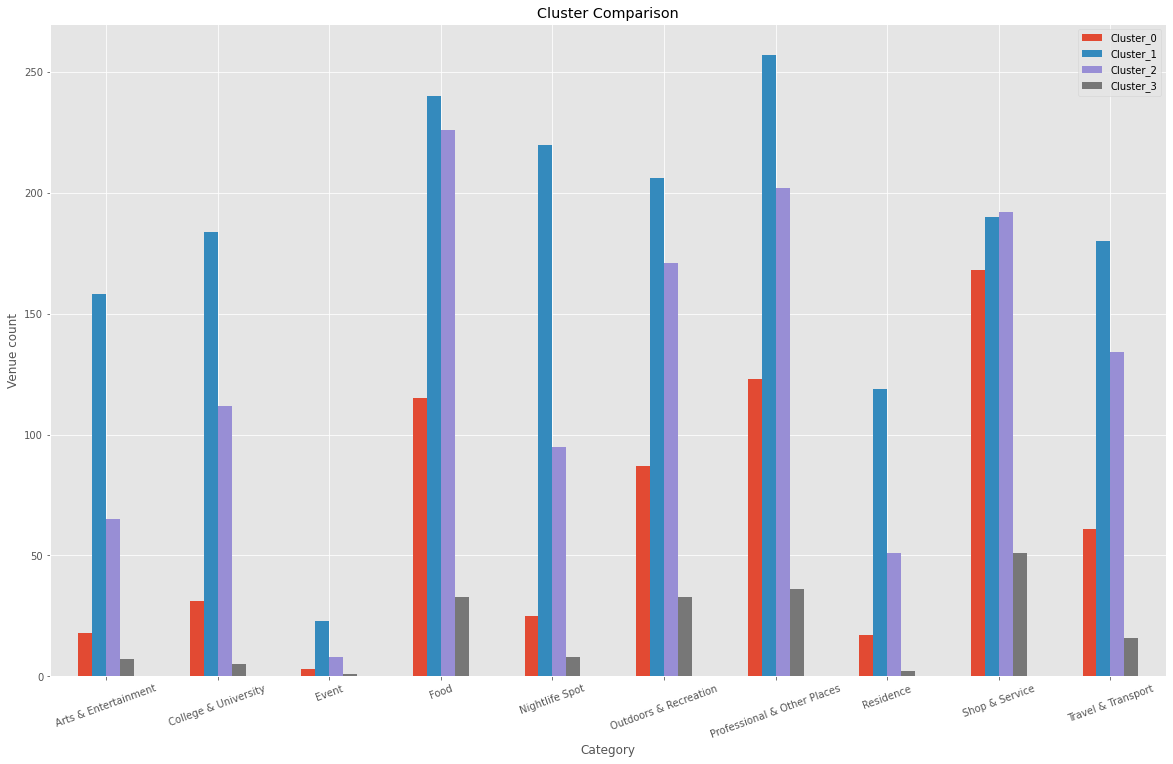

In [64]:
df_g1.plot(kind='bar', figsize=(20, 12))

plt.xlabel('Category') # add to x-label to the plot
plt.ylabel('Venue count') # add y-label to the plot
plt.title('Cluster Comparison') # add title to the plot
plt.xticks(df_g1.index, labels= df_g1['Category'], rotation = 20)

plt.show()

In [49]:
from sklearn.preprocessing import MinMaxScaler
X=df_g1[['Cluster_0', 'Cluster_1', 'Cluster_2',
       'Cluster_3']]
X1=MinMaxScaler().fit_transform(X)
df_g1_MM = pd.DataFrame(X1)
df_g1_MM.head(20)


,0,1,2,3
0,0.090909,0.576923,0.261468,0.12
1,0.169697,0.688034,0.477064,0.08
2,0.000000,0.000000,0.000000,0.00
3,0.678788,0.927350,1.000000,0.64
4,0.133333,0.841880,0.399083,0.14
5,0.509091,0.782051,0.747706,0.64
6,0.727273,1.000000,0.889908,0.70
7,0.084848,0.410256,0.197248,0.02
8,1.000000,0.713675,0.844037,1.00
9,0.351515,0.670940,0.577982,0.30


In [50]:
df_g1.reset_index(inplace=True)
df_g1.rename(columns={'index': 'Cat_No.'}, inplace=True)
df_g1.head(20)

,Cat_No.,Category,Cluster_0,Cluster_1,Cluster_2,Cluster_3
0,0,Arts & Entertainment,18.0,158.0,65.0,7.0
1,1,College & University,31.0,184.0,112.0,5.0
2,2,Event,3.0,23.0,8.0,1.0
3,3,Food,115.0,240.0,226.0,33.0
4,4,Nightlife Spot,25.0,220.0,95.0,8.0
5,5,Outdoors & Recreation,87.0,206.0,171.0,33.0
6,6,Professional & Other Places,123.0,257.0,202.0,36.0
7,7,Residence,17.0,119.0,51.0,2.0
8,8,Shop & Service,168.0,190.0,192.0,51.0
9,9,Travel & Transport,61.0,180.0,134.0,16.0


[Text(0, 0, 'Arts & Entertainment'),
 Text(0, 0, 'College & University'),
 Text(0, 0, 'Event'),
 Text(0, 0, 'Food'),
 Text(0, 0, 'Nightlife Spot'),
 Text(0, 0, 'Outdoors & Recreation'),
 Text(0, 0, 'Professional & Other Places'),
 Text(0, 0, 'Residence'),
 Text(0, 0, 'Shop & Service'),
 Text(0, 0, 'Travel & Transport')]

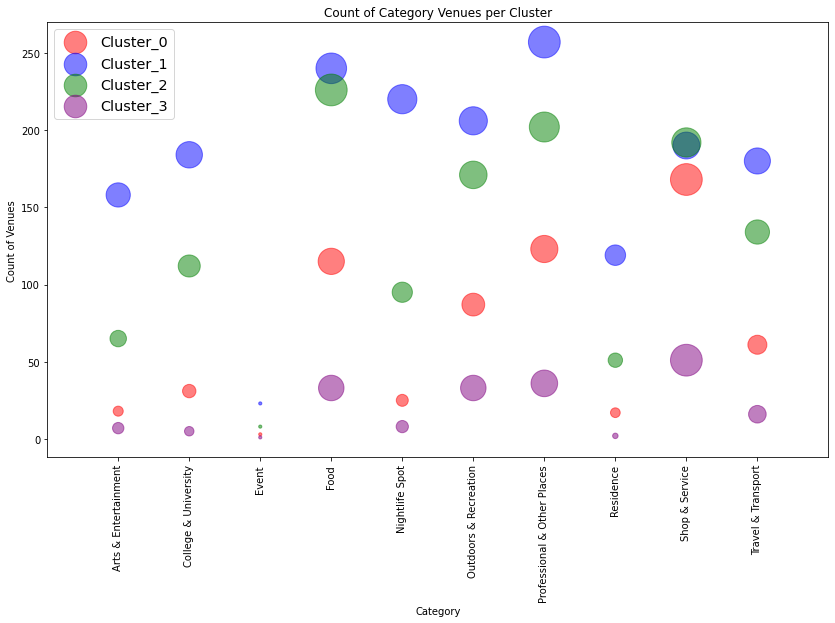

In [51]:
ax0 = df_g1.plot(kind='scatter',
                    x='Cat_No.',
                    y='Cluster_0',
                    figsize=(14, 8),
                    alpha=0.5,                 
                    color='red',
                    s=df_g1_MM.iloc[:, 0] * 1000 + 10,  
                    xlim=(-1, 10)
                   )

ax1 = df_g1.plot(kind='scatter',
                    x='Cat_No.',
                    y='Cluster_1',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='blue',
                    s=df_g1_MM.iloc[:,1 ] * 1000 + 10,  
                    ax=ax0
                   )

ax1 = df_g1.plot(kind='scatter',
                    x='Cat_No.',
                    y='Cluster_2',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='green',
                    s=df_g1_MM.iloc[:,2 ] * 1000 + 10,   
                    ax=ax0
                   )

ax1 = df_g1.plot(kind='scatter',
                    x='Cat_No.',
                    y='Cluster_3',
                    figsize=(14, 8),
                    alpha=0.5,                  
                    color='purple',
                    s=df_g1_MM.iloc[:,3 ] * 1000 + 10,   
                    ax=ax0
                   )

ax0.set_ylabel('Count of Venues')
ax0.set_xlabel('Category')
ax0.set_title('Count of Category Venues per Cluster')
ax0.legend(['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3'], loc='upper left', fontsize='x-large')
ax0.set_xticks(df_g1['Cat_No.'])
ax0.set_xticklabels(cat, rotation=90)

## **4. Finding the Best Cities to live in California** 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

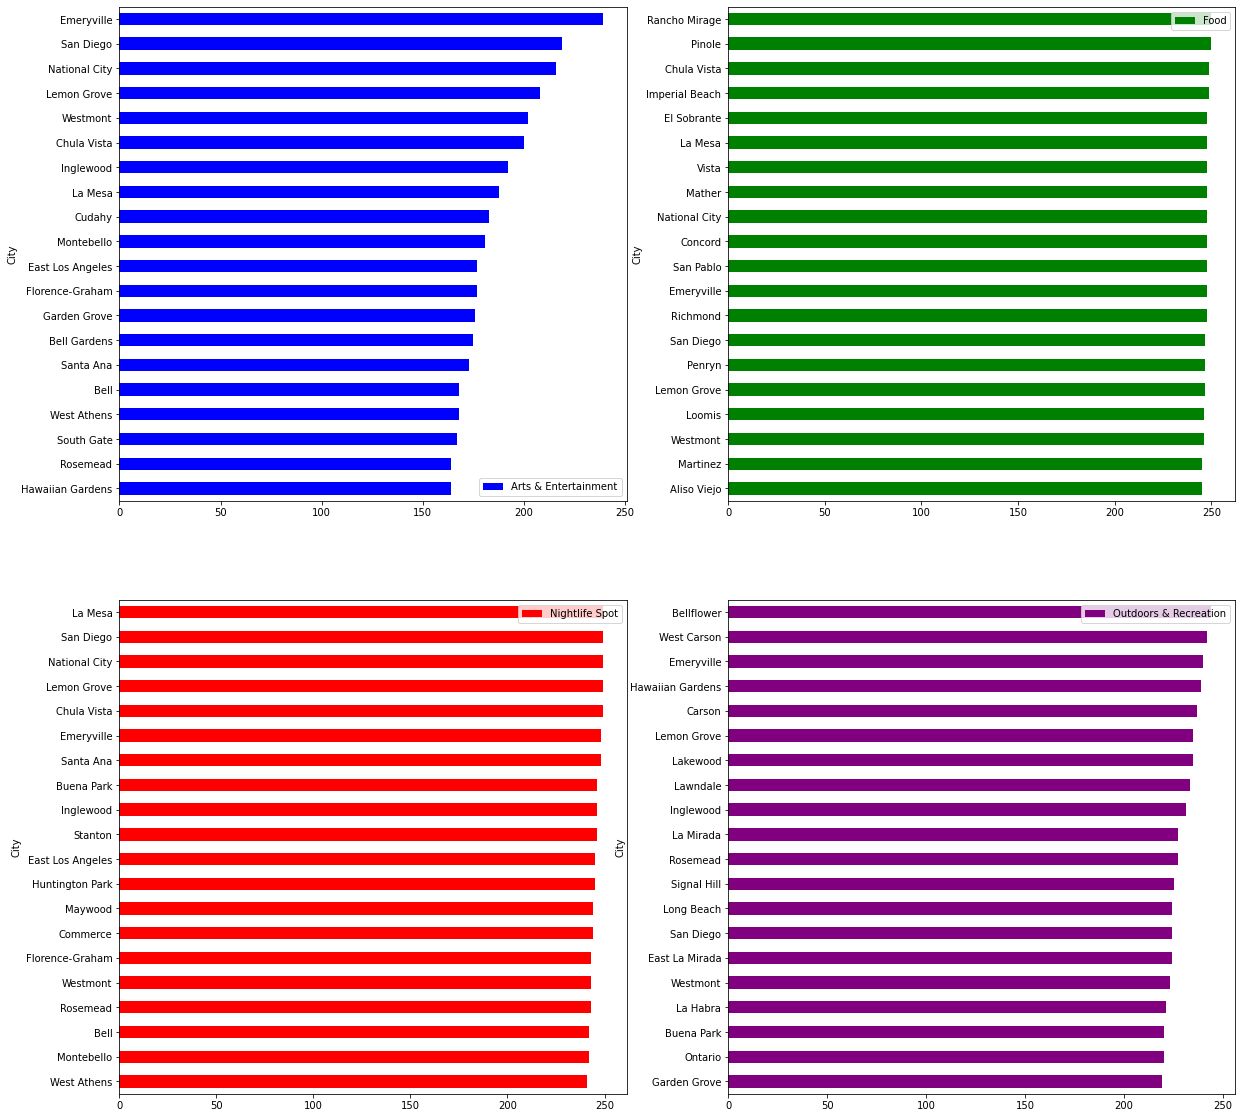

In [54]:
df_v_Arts=df_v[['City', 'Arts & Entertainment']].sort_values('Arts & Entertainment', ascending=False).head(20).set_index('City')
df_v_Food=df_v[['City', 'Food']].sort_values('Food', ascending=False).head(20).set_index('City')
df_v_Nightlife=df_v[['City', 'Nightlife Spot']].sort_values('Nightlife Spot', ascending=False).head(20).set_index('City')
df_v_Outdoors=df_v[['City', 'Outdoors & Recreation']].sort_values('Outdoors & Recreation', ascending=False).head(20).set_index('City')

fig = plt.figure()
ax0=fig.add_subplot(2,2,1)
ax0 = df_v_Arts.plot.barh(color='blue', figsize=(20, 20), ax=ax0).invert_yaxis()


ax1=fig.add_subplot(2,2,2)
ax1 = df_v_Food.plot.barh(color = 'green',  ax=ax1).invert_yaxis()

ax2=fig.add_subplot(2,2,3)
ax2 = df_v_Nightlife.plot.barh(color = 'red', ax=ax2).invert_yaxis()

ax3=fig.add_subplot(2,2,4)
ax3 = df_v_Outdoors.plot.barh(color = 'purple', ax=ax3).invert_yaxis()



In [69]:


Favorite_Categories = ['Arts & Entertainment',
                       'Food',
                       'Nightlife Spot', 
                       'Outdoors & Recreation']


Cities_lists=[]
for i in np.arange(len(Favorite_Categories)):
  top_50=set(df_v.nlargest(50, Favorite_Categories[i])['City'])
  Cities_lists.append(top_50)
  

common = Cities_lists[0].intersection(*Cities_lists)
print('Top Cities common in Favorite Categories are:')
for city in common:
  print(city)


Top Cities common in Favorite Categories are:
La Mesa
West Carson
Inglewood
West Athens
Chula Vista
Lemon Grove
East Los Angeles
National City
Emeryville
Lawndale
San Diego
Bell Gardens
Westmont
Montebello


In [71]:
filter= df_v['City'].isin(common)
df_v1=df_v[filter]
df_v1[['City', 'Cluster']]

,City,Cluster
1,San Diego,1
34,Lawndale,1
57,Inglewood,1
60,Emeryville,1
66,La Mesa,1
80,West Carson,1
82,Montebello,1
90,Chula Vista,1
102,West Athens,1
132,Westmont,1


## *All in the same top cluster...*